<a href="https://colab.research.google.com/github/Vyoma-garg/Computer-Vision_2/blob/main/CV_CameraCalibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
# import the necessary packages
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

# **Q3. Camera Calibration**

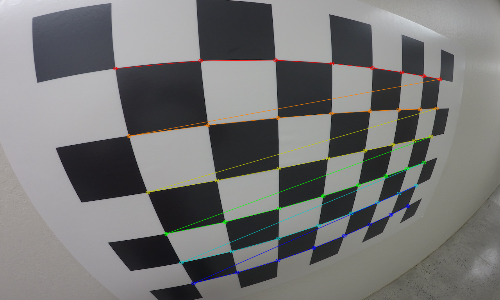

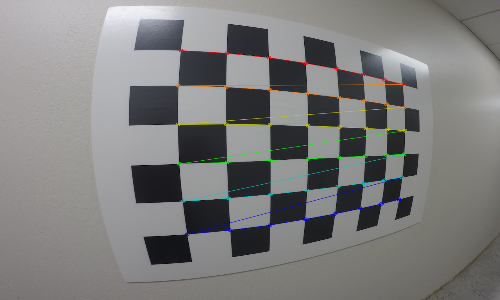

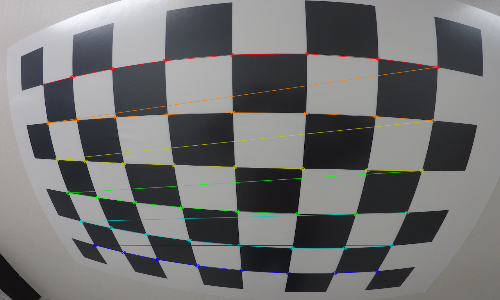

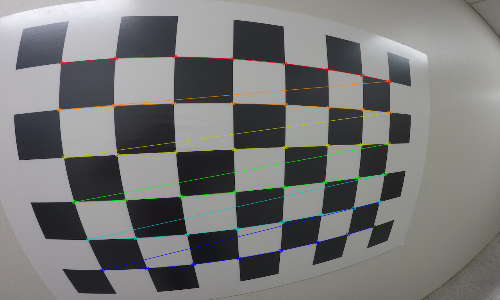

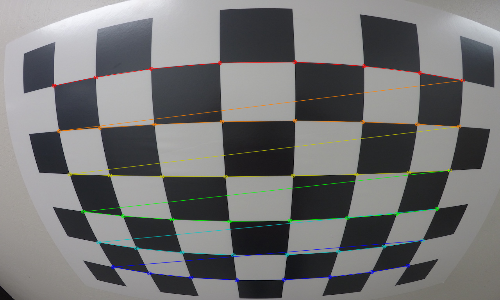

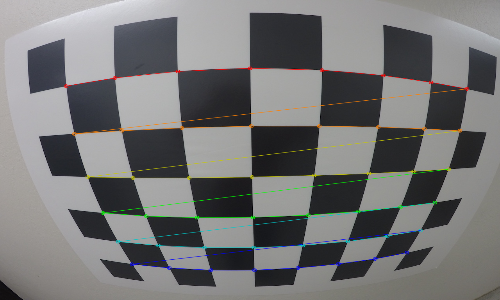

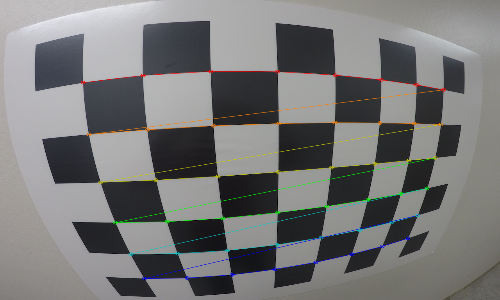

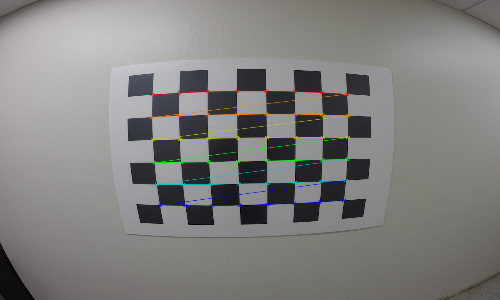

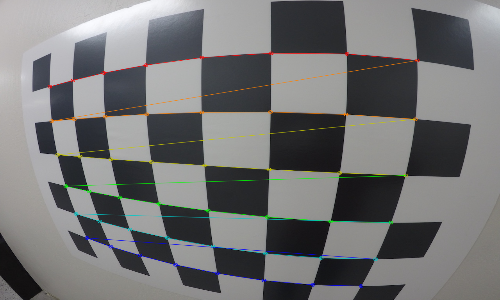

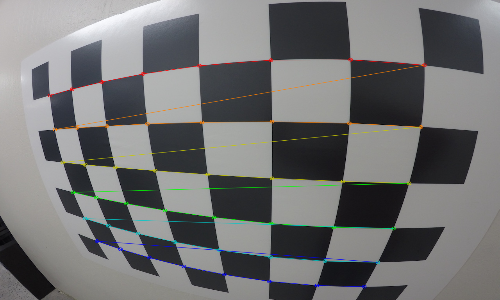

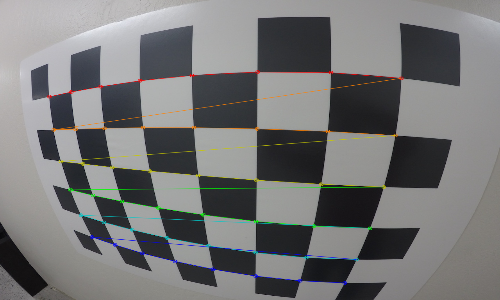

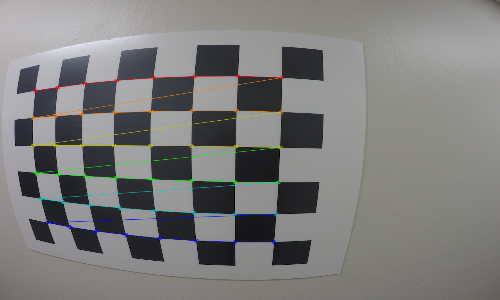

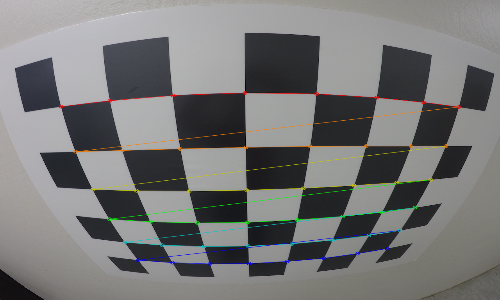

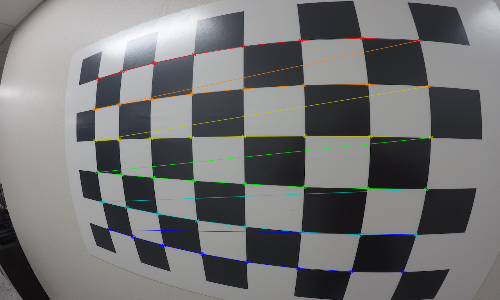

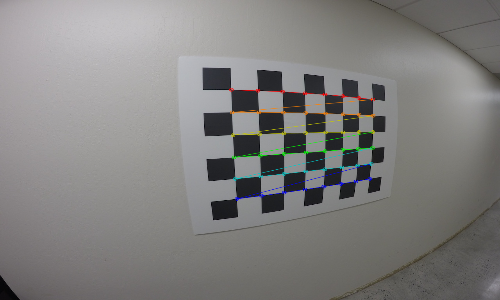

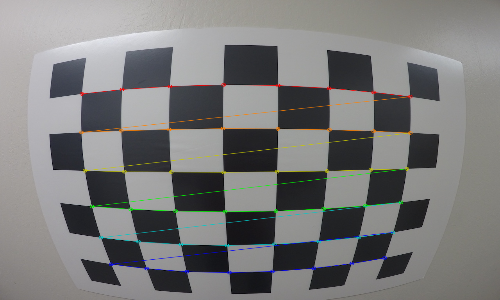

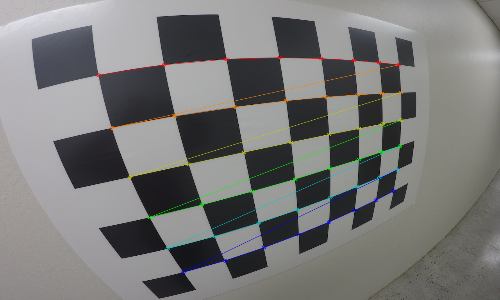

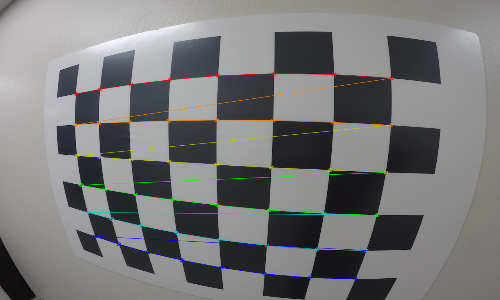

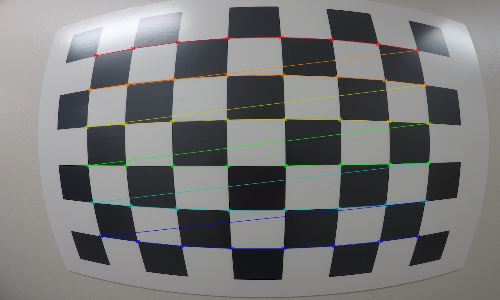

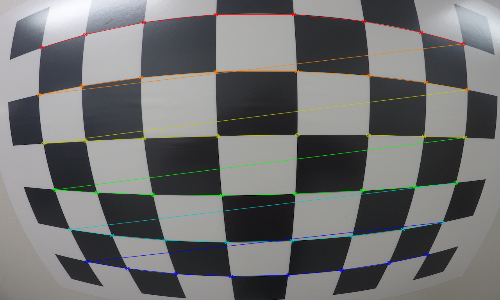

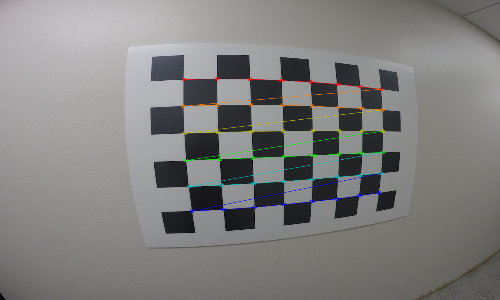

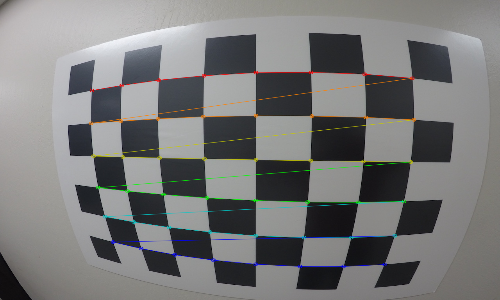

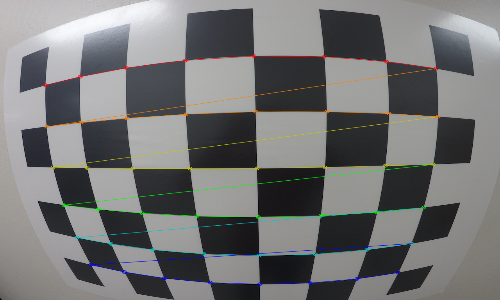

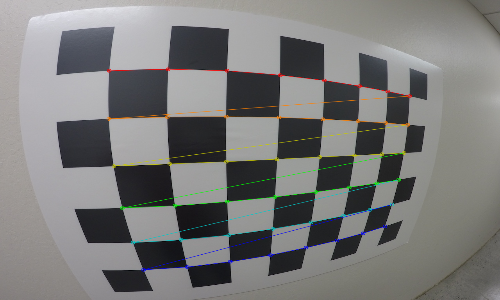

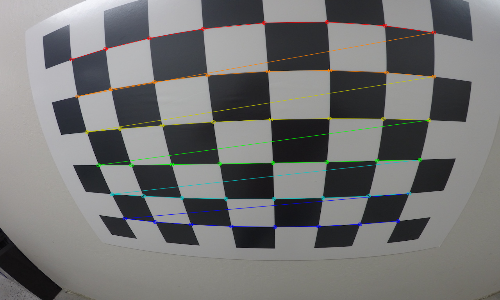

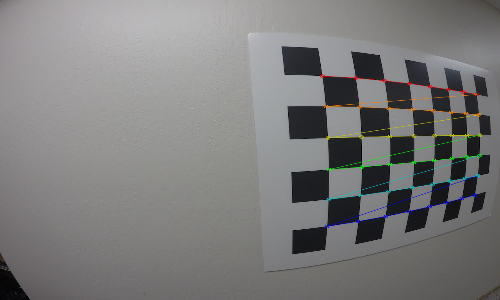

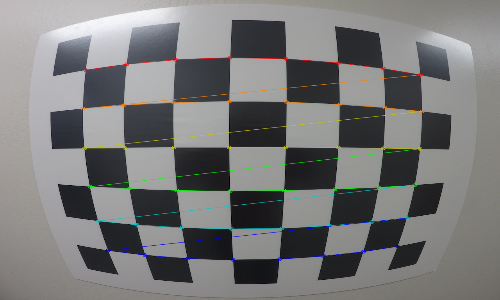

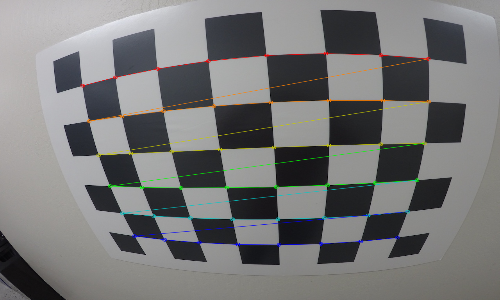

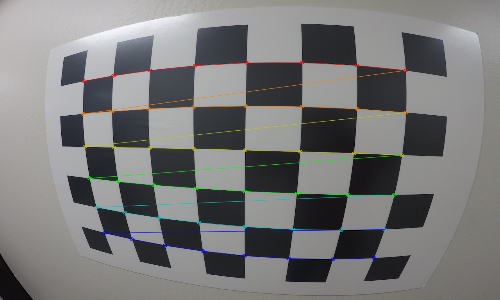

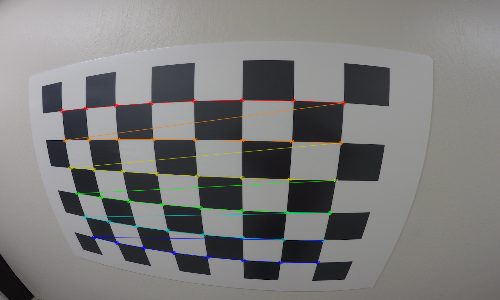

In [ ]:
import numpy as np
import cv2
import glob

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (8,6), corners2,ret)
        img=cv2.resize(img,(500,300))
        cv2_imshow(img)

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
print('Intrinsic Matrix\n',mtx)
print('Distortion Coefficients\n',dist)

Intrinsic Matrix
 [[559.66086702   0.         651.12251224]
 [  0.         560.74158563 498.77835168]
 [  0.           0.           1.        ]]
Distortion Coefficients
 [[-2.32230232e-01  6.13449663e-02  4.37961599e-06  5.48089827e-05
  -7.48458246e-03]]


In [ ]:
for imgd in images:
    imgd = cv2.imread(imgd)
    h,  w = imgd.shape[:2]
    newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

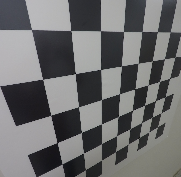

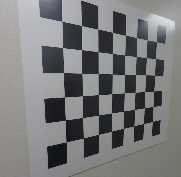

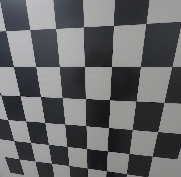

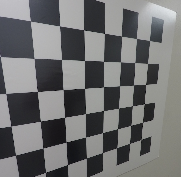

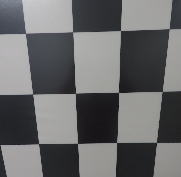

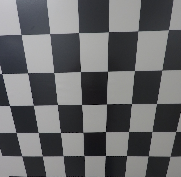

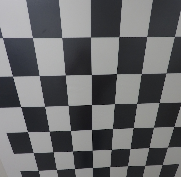

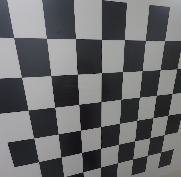

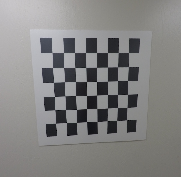

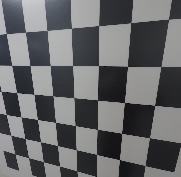

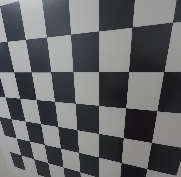

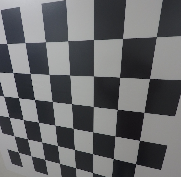

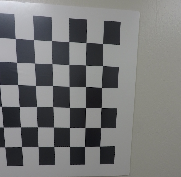

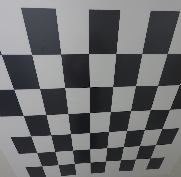

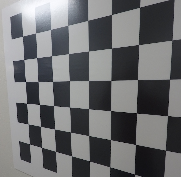

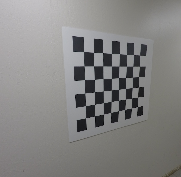

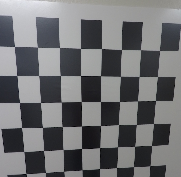

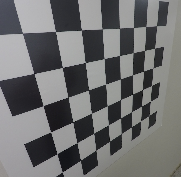

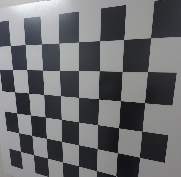

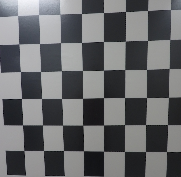

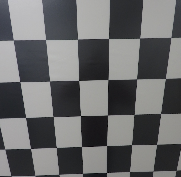

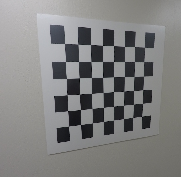

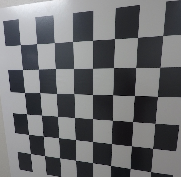

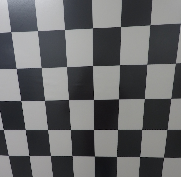

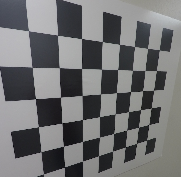

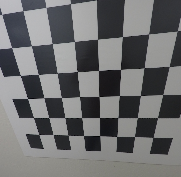

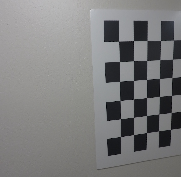

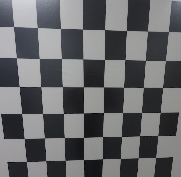

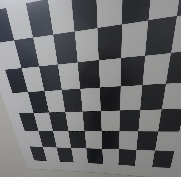

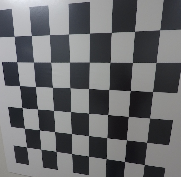

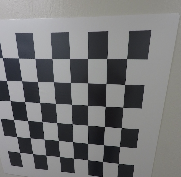

In [ ]:
# undistort
for img in images:
    img1 = cv2.imread(img) 
    dst = cv2.undistort(img1, mtx, dist, None, newcameramtx)

# crop the image
    x,y,w,h = roi
    dst = dst[y:y+h, x:x+w]
    cv2_imshow(dst)

(1280, 960)


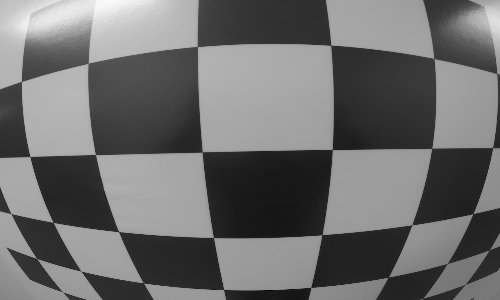

In [ ]:
print(gray.shape[::-1])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
img = cv2.imread('test_image.jpg',0)
#Resizing just to get better looking image in output
img1=cv2.resize(img,(500,300))
cv2_imshow(img1)
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

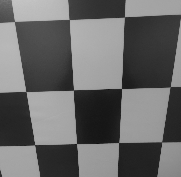

In [ ]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
#dst=cv2.resize(dst,(500,500))
cv2_imshow(dst)